# 🤖 Exercise TCLab: Design and Comparison of P, PI, and PID Controllers

In this activity, you'll experiment with **real-time temperature control** using the **TCLab (Temperature Control Lab)** hardware. Your goal is to design and compare the performance of **P, PI, and PID controllers**.

---

## 🎯 Objective

- Understand the behavior and tuning of **Proportional (P)**, **Proportional-Integral (PI)**, and **Proportional-Integral-Derivative (PID)** controllers.
- Use **experimental data** from the TCLab to observe behavior of the controllers.

---

## 🛠️ Instructions

1. Follow each link below and complete the guided activity:
   - 🔗 [P-Only Control](https://apmonitor.com/pdc/index.php/Main/TCLabPOnlyControl)
   - 🔗 [PI Control](https://apmonitor.com/pdc/index.php/Main/TCLabPIControl)
   - 🔗 [PID Control](https://apmonitor.com/pdc/index.php/Main/TCLabPIDControl)
   - 🔗 [PI Tuning](https://apmonitor.com/pdc/index.php/Main/TCLabPIControlTuning)
   - 🔗 [PID Tuning](https://apmonitor.com/pdc/index.php/Main/TCLabPIDControlTuning)

## 📈 Optional: Plot and Compare

Try plotting the response curves of the three controller types on the same graph to visually compare their dynamics. You can use Python and `matplotlib` to do this.


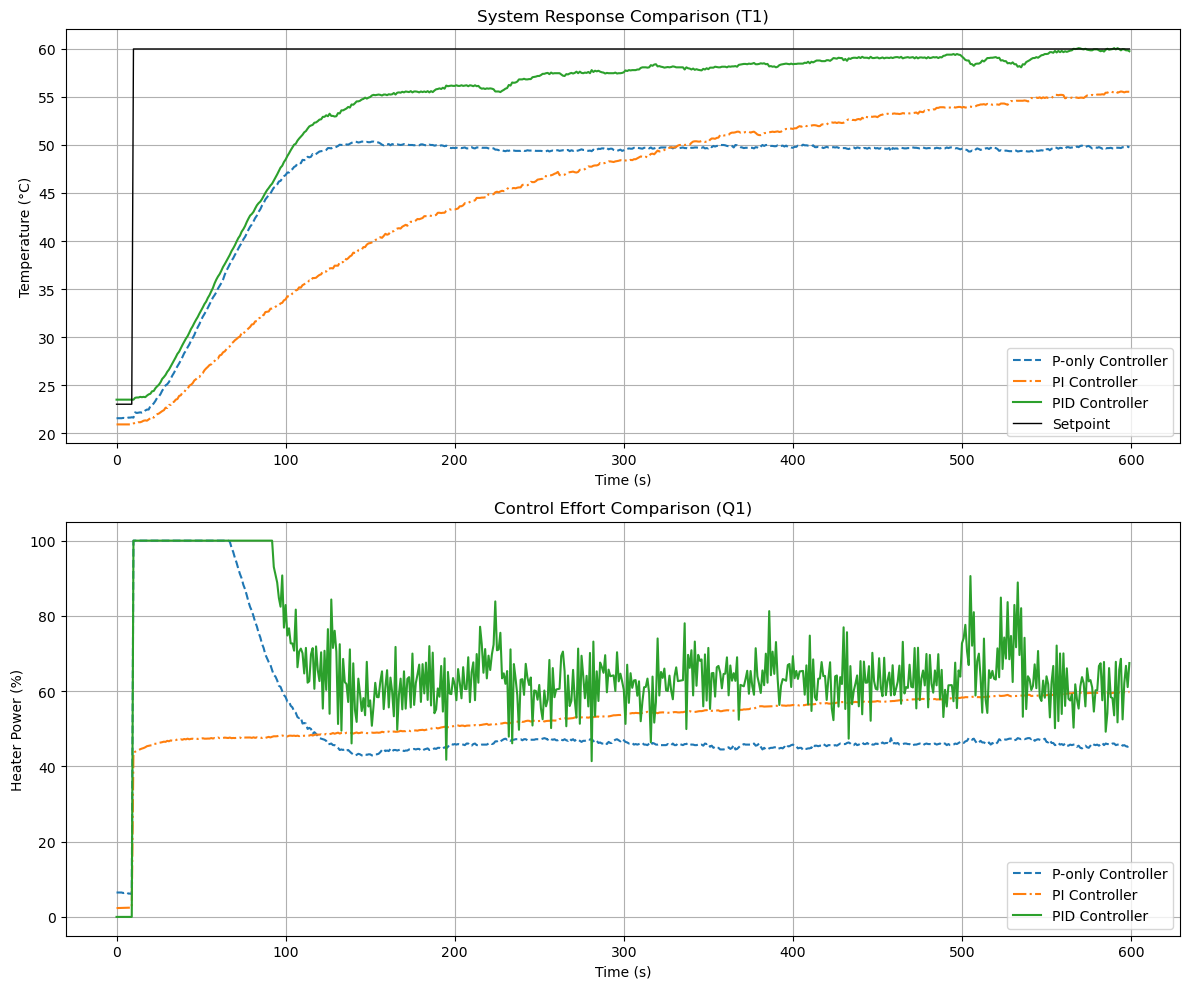

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load datasets ===
p_only = pd.read_csv('ExperimentalDataTCLAB/P-Control/P-only.csv')
pi_control = pd.read_csv('ExperimentalDataTCLAB/PI-Control/PI_control.csv')
pid_control = pd.read_csv('ExperimentalDataTCLAB/PID-Control/PID_control.csv')

# === Extract relevant columns ===
# Assumption: columns are Time, Q1 (control action), T1 (measured temperature), SP1 (setpoint)

time_p = p_only['Time']
q1_p = p_only['Q1']
t1_p = p_only['T1']
sp1_p = p_only['SP1']

time_pi = pi_control['Time']
q1_pi = pi_control['Q1']
t1_pi = pi_control['T1']
sp1_pi = pi_control['SP1']

time_pid = pid_control['Time']
q1_pid = pid_control['Q1']
t1_pid = pid_control['T1']
sp1_pid = pid_control['SP1']

# === Plotting ===

plt.figure(figsize=(12, 10))

# --- Subplot 1: System Output (T1) ---
plt.subplot(2, 1, 1)
plt.plot(time_p, t1_p, '--', label='P-only Controller')
plt.plot(time_pi, t1_pi, '-.', label='PI Controller')
plt.plot(time_pid, t1_pid, '-', label='PID Controller')
plt.plot(time_p, sp1_p, 'k-', linewidth=1, label='Setpoint')
plt.title('System Response Comparison (T1)')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()

# --- Subplot 2: Control Effort (Q1) ---
plt.subplot(2, 1, 2)
plt.plot(time_p, q1_p, '--', label='P-only Controller')
plt.plot(time_pi, q1_pi, '-.', label='PI Controller')
plt.plot(time_pid, q1_pid, '-', label='PID Controller')
plt.title('Control Effort Comparison (Q1)')
plt.xlabel('Time (s)')
plt.ylabel('Heater Power (%)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


---

## ✅ Conclusion: 

This exercise demonstrates how different control strategies (P-only, PI, and PID) affect both the **system response** and the **control effort**:

- **P-only Controller**:  
  - Achieves a moderate rise in temperature but exhibits a steady-state error (offset) relative to the setpoint.
  - The control effort (Q1) stabilizes at a lower level but is insufficient to fully eliminate the steady-state error.
  - System shows smooth behavior but limited final accuracy.

- **PI Controller**:  
  - Improves the steady-state performance by eliminating the offset, thanks to the integral action.
  - However, the system response is slower compared to the P-only controller.
  - The control effort remains relatively smooth but at a slightly higher level to sustain convergence toward the setpoint.

- **PID Controller**:  
  - Provides the fastest convergence to the setpoint with minimal steady-state error.
  - Introduces higher variability (oscillations) in the control effort (Q1), indicating more aggressive corrective actions.
  - Despite control effort fluctuations, the system output (T1) is well regulated and reaches the target temperature quickly.

### 🔎 Summary:
- **P-only**: Quick but inaccurate (steady-state error remains).
- **PI**: Eliminates steady-state error but results in a slower response.
- **PID**: Best accuracy and speed, but introduces control signal oscillations.

This comparison highlights the classical trade-offs in control system design:  
faster response and improved accuracy often come at the expense of greater control effort variability.

---
